In [1]:
# A basic aggregation model -- Vicsek

import numpy  # use the package for numerical (matrix) calculations

N = 5  # number of cells

state0 = numpy.zeros(shape=(N * 3,))  # set everything to zero
print(state0)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:


state0[0::3] = numpy.random.rand(N, ) * 2 * numpy.pi  # set angles to random angles - state0[0::3] means "select every third element starting from 0th (initial element)"
print(state0)


[1.82867547 0.         0.         5.07079922 0.         0.
 1.87330371 0.         0.         3.52231991 0.         0.
 6.00798552 0.         0.        ]


In [3]:
help(numpy.random.rand)


Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [4]:
D = 25
state0[1::3] = numpy.random.rand(N, ) * D  # set horizontal coordinates
print(state0)


[ 1.82867547 18.78490433  0.          5.07079922  4.21378573  0.
  1.87330371 21.27991784  0.          3.52231991  9.52686169  0.
  6.00798552 16.12090298  0.        ]


In [5]:
state0[2::3] = numpy.random.rand(N, ) * D  # set horizontal coordinates
print(state0)

[ 1.82867547 18.78490433 21.67973332  5.07079922  4.21378573 21.199402
  1.87330371 21.27991784  3.84268601  3.52231991  9.52686169 15.70215649
  6.00798552 16.12090298 11.91682545]


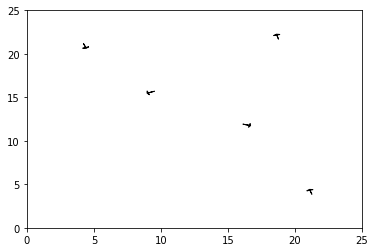

In [7]:
import matplotlib.pyplot as plt  #this gives us access to plotting functions
%matplotlib inline
# this makes plots appear in the same window as code

ax = plt.axes()
ax.set_xlim(0, D)
ax.set_ylim(0, D)

for n in range(N):
    mytheta, myx, myy = state0[numpy.array([0, 1, 2])+3 * n]  # extract coordinates for the n-th cell
    ax.arrow( myx, myy, 0.5 * numpy.cos(mytheta), 0.5 * numpy.sin(mytheta),
    head_width=0.5, head_length=0.1, fc='k', ec='k')  # plot an arrow

plt.show()

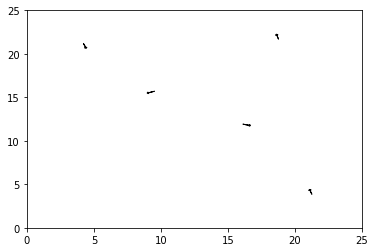

In [8]:
def plotcells(statevector, D=25):
    ax = plt.axes()
    ax.set_xlim(0, D)
    ax.set_ylim(0, D)
    arScale = D / 250
    N = numpy.size(
        statevector) // 3  # determine the number of cells from the size of statevector; // means integer division
    for n in range(N):
        mytheta, myx, myy = statevector[numpy.array([0, 1, 2]) + 3 * n]  # extract coordinates for the n-th cell
        ax.arrow(myx, myy, 5 * arScale * numpy.cos(mytheta), 5 * arScale * numpy.sin(mytheta),
                 head_width=2 * arScale, head_length=arScale, fc='k', ec='k')  # plot an arrow

    plt.show()
    return ax


ax = plotcells(state0)

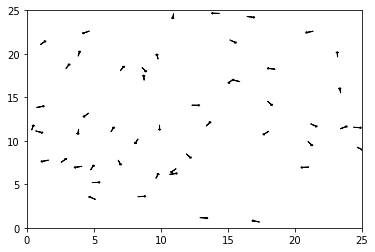

<AxesSubplot:>

In [9]:
def initializeCells(N, D=25):
    state0 = numpy.zeros(shape=(N * 3,))
    state0[0::3] = numpy.random.rand(N, ) * 2 * numpy.pi
    state0[1::3] = numpy.random.rand(N, ) * D
    state0[2::3] = numpy.random.rand(N, ) * D
    return state0

N = 50
state0 = initializeCells(N)
plotcells(state0)

In [10]:

N = 5
state0 = initializeCells(N)

T = 10  # number of time steps we want to simulate

trajectory = numpy.zeros(shape=(N * 3, T))
trajectory[:, 0] = state0
numpy.set_printoptions(precision=1)  # print at most 2 decimals to keep things compact
print(trajectory)

[[ 6.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [12.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 3.8  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 7.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 8.8  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 3.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [22.7  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 8.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 1.3  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [23.9  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [10.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 5.4  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [17.8  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 3.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


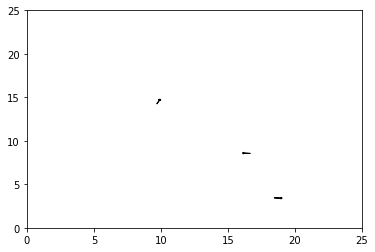

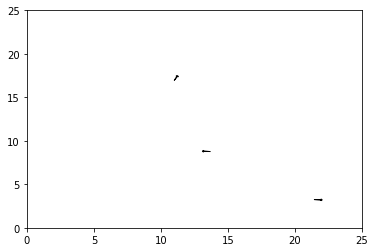

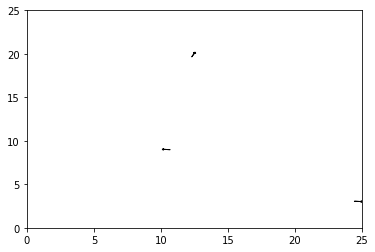

In [12]:

def update_rule_1(present, stepsize=1):
    future = present  # first set the future to whatever present was
    N = numpy.size(present) // 3
    for n in range(N):
        mytheta = present[3 * n]
        v = numpy.array([numpy.cos(mytheta), numpy.sin(mytheta)])
        future[numpy.array([1, 2]) + 3 * n] = present[numpy.array([1, 2]) + 3 * n] + stepsize * v
    return (future)


for t in range(T - 1):
    trajectory[:, t + 1] = update_rule_1(trajectory[:, t],
                                         3)  # repeatedly apply update rule to columns of our trajectory matrix
for t in range(3):
    plotcells(trajectory[:, t])

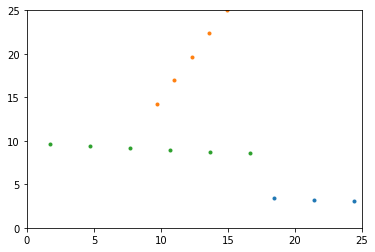

In [13]:
def plottrajectories(trajectory, D=25):
    ax = plt.axes()
    ax.set_xlim(0, D)
    ax.set_ylim(0, D)
    plt.plot(trajectory[1::3, :].T, trajectory[2::3, :].T, '.')


plottrajectories(trajectory)

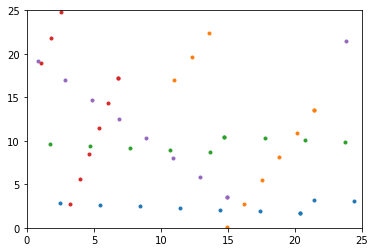

In [14]:

def update_rule_2(present, stepsize=1, D=25):
    future = present  # first set the future to whatever present was
    N = numpy.size(present) // 3
    for n in range(N):
        mytheta = present[3 * n]
        v = numpy.array([numpy.cos(mytheta), numpy.sin(mytheta)])
        future[numpy.array([1, 2]) + 3 * n] = present[numpy.array([1, 2]) + 3 * n] + stepsize * v
        future[numpy.array([1, 2]) + 3 * n] = numpy.mod(future[numpy.array([1, 2]) + 3 * n],
                                                        D)  # <-- this is the added line
    return (future)


# let's rerun everything
for t in range(T - 1):
    trajectory[:, t + 1] = update_rule_2(trajectory[:, t],
                                         3)  # repeatedly apply update rule to columns of our trajectory matrix

plottrajectories(trajectory)


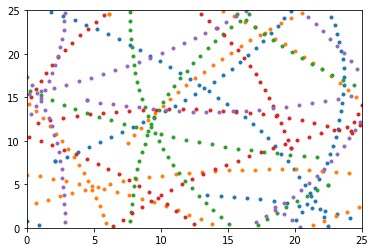

In [15]:

def update_rule_3(present, stepsize=1, eta=0.1, D=25, v0=0.03):
    future = present  # first set the future to whatever present was
    N = numpy.size(present) // 3
    for n in range(N):
        mytheta = present[3 * n]
        v = v0 * numpy.array([numpy.cos(mytheta), numpy.sin(mytheta)])
        future[numpy.array([1, 2]) + 3 * n] = present[numpy.array([1, 2]) + 3 * n] + stepsize * v
        future[numpy.array([1, 2]) + 3 * n] = numpy.mod(future[numpy.array([1, 2]) + 3 * n], D)

    # add noise to angle
    noise = (-eta / 2 + numpy.random.rand(N, ) * eta / 2)
    future[0::3] = present[0::3] + noise

    return (future)

T = 100  # number of time steps we want to simulate
trajectory = numpy.zeros(shape=(N * 3, T));
trajectory[:, 0] = state0
for t in range(T - 1):
    trajectory[:, t + 1] = update_rule_3(trajectory[:, t],
                                         v0=1)  # repeatedly apply update rule to columns of our trajectory matrix

plottrajectories(trajectory)


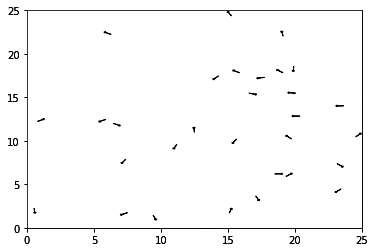

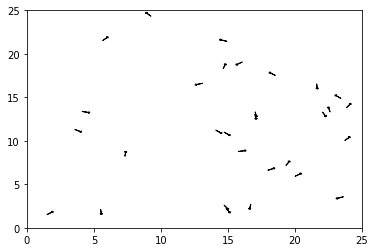

<AxesSubplot:>

In [17]:
def update_rule_4(present, stepsize=1, eta=0.1, D=25, R=1, v0=0.03):
    future = present  # first set the future to whatever present was
    N = numpy.size(present) // 3
    neighborMeanAngles = numpy.zeros(N, )
    for n in range(N):
        mytheta = present[3 * n]
        mypos = present[numpy.array([1, 2]) + 3 * n]

        ## START NEW CODE
        angleList = []  # list of angles to average is empty at first

        for m in range(N):  # loop through all other cells
            themPos = present[numpy.array([1, 2]) + 3 * m]
            if (numpy.linalg.norm(mypos - themPos) < R):  # distance between vectors is less than R
                angleList.append(present[3 * m])  # add to list of angles to average

        neighborMeanAngles[n] = numpy.sum(numpy.array(angleList)) / len(angleList)
        ## FINISH NEW CODE
        v = v0 * numpy.array([numpy.cos(mytheta), numpy.sin(mytheta)])
        future[numpy.array([1, 2]) + 3 * n] = present[numpy.array([1, 2]) + 3 * n] + stepsize * v
        future[numpy.array([1, 2]) + 3 * n] = numpy.mod(future[numpy.array([1, 2]) + 3 * n], D)

    noise = (-eta / 2 + numpy.random.rand(N, ) * eta / 2)  # add noise to angle
    future[0::3] = present[0::3] + neighborMeanAngles + noise

    return (future)


N = 30
state0 = initializeCells(N)

T = 300  # number of time steps we want to simulate

trajectory = numpy.zeros(shape=(N * 3, T))
trajectory[:, 0] = state0

for t in range(T - 1):
    trajectory[:, t + 1] = update_rule_4(trajectory[:, t], stepsize=5, eta=0.1,
                                         R=1)  # repeatedly apply update rule to columns of our trajectory matrix

plottrajectories(trajectory)
plotcells(trajectory[:, 0])
plotcells(trajectory[:, -1])

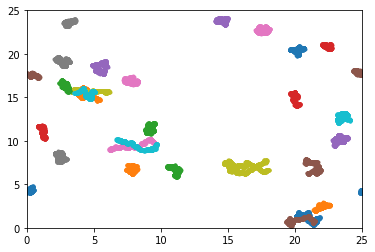

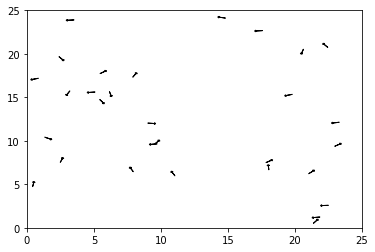

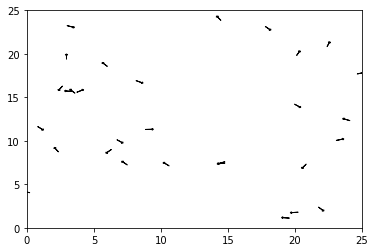

array([[ 3.3,  5.3,  3.2, ...,  1.7,  3.2,  3.2],
       [21.9, 21.8, 21.9, ..., 20.3, 20.3, 20.3],
       [ 1.2,  1.2,  1.2, ...,  1.8,  1.8,  1.8],
       ...,
       [ 3.2,  1.2,  3.4, ...,  4.3,  2.3,  2.3],
       [ 5.1,  5.1,  5.1, ...,  3.6,  3.6,  3.6],
       [15.6, 15.6, 15.6, ..., 15.5, 15.5, 15.5]])

In [23]:

import scipy.spatial


def update_rule_5(present, stepsize=1, eta=0.1, D=25, R=1, v0=0.03):
    future = present  # first set the future to whatever present was
    N = numpy.size(present) // 3
    neighborMeanAngles = numpy.zeros(N, )

    # create a matrix where each row is a cell, and columns are x-y coordinates
    positions = numpy.zeros((N, 2))
    positions[:, 0] = present[1::3]
    positions[:, 1] = present[2::3]
    angles = present[0::3]

    # first, identify all neighbors at once
    Dmatrix = scipy.spatial.distance.pdist(positions)
    Dmatrix = scipy.spatial.distance.squareform(Dmatrix)  # Dmatrix[i,j] is a distance between cells i and j
    Neighbors = Dmatrix <= R  # Neighbors[i,j] = true if distance between i and j is closer than R
    # numpy.fill_diagonal(Neighbors, False) # make sure that cell is never it's own neighbor Neighbors[i,i] = False!

    for n in range(N):
        mytheta = angles[n]  # get cell angle
        mypos = positions[n, :]  # get cell position

        sel = Dmatrix[:, n] < R  # selection vector - true where distance is smaller than R, false otherwise
        neighborMeanAngles[n] = numpy.sum(angles[Neighbors[:, n]]) / numpy.sum(
            Neighbors[:, n])  # compute mean neighbor angle

        v = v0 * numpy.array([numpy.cos(mytheta), numpy.sin(mytheta)])
        future[numpy.array([1, 2]) + 3 * n] = present[numpy.array([1, 2]) + 3 * n] + stepsize * v
        future[numpy.array([1, 2]) + 3 * n] = numpy.mod(future[numpy.array([1, 2]) + 3 * n], D)

    noise = (-eta / 2 + numpy.random.rand(N, ) * eta / 2)  # add noise to angle
    future[0::3] = numpy.mod(present[0::3] + neighborMeanAngles + noise, 2 * numpy.pi)

    return (future)



def experiment(N=30, T=1000, R=1, D=25, eta=0.1,
               stepsize=1):  # values listed here are 'defaults': they are used if we don't specify the appropriate constant
    state0 = initializeCells(N, D=D)
    trajectory = numpy.zeros(shape=(N * 3, T));
    trajectory[:, 0] = state0

    for t in range(T - 1):
        trajectory[:, t + 1] = update_rule_5(trajectory[:, t], stepsize=stepsize, eta=eta, R=R,
                                             D=D)  # repeatedly apply update rule to columns of our trajectory matrix

    plt.figure(0)
    plottrajectories(trajectory, D=D)  # trajectory plot
    plt.figure(1)
    plotcells(trajectory[:, 0], D=D)  # initial state
    plt.figure(2)
    plotcells(trajectory[:, -1], D=D)  #final state
    return trajectory
experiment()

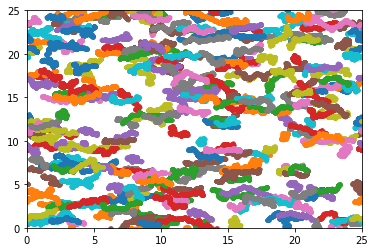

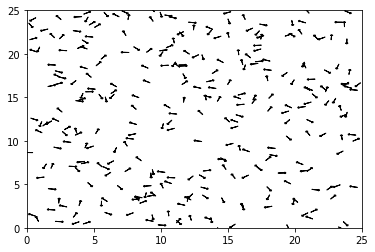

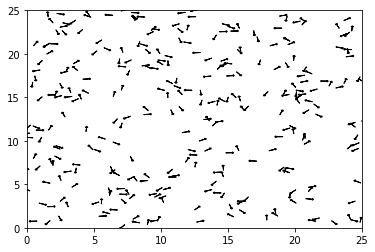

In [20]:
experiment(N=300)  # more cells


In [ ]:
experiment(N=300, T=3000)  # more cells and more time

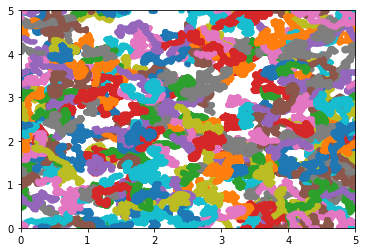

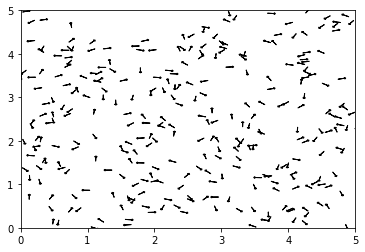

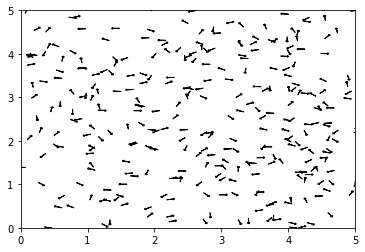

In [22]:
'd say that the cells look somewhat more clustered now! Now, take a look at Topaz paper and see what parameters they use, and try to recreate the pictures that they have. You won'


traj = experiment(D=5, N=300, T=1000)